# 0. Import Dependencies of the Project

In [2]:
#Import Python Libraries
import pandas as pd
import pickle
import time
import numpy as np

#Import Self-written Functions
import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from d00_utils.calculateTimeDifference import calculateTimeDifference #Function to calc time difference
from d01_data.loadCommits import loadCommits #Function to load SVN data
from d02_intermediate.cleanCommitData import cleanCommitData #Function to clean commit data
from d02_intermediate.cleanJiraData import cleanJiraData #Function to clean JIRA data
from d03_processing.createCorpusFromDocumentList import createCorpusFromDocumentList #Function to create a corpus
from d03_processing.checkValidityTrace import checkValidityTrace #Function to see if a trace is valid
from d03_processing.calculateTimeDif import calculateTimeDif #Calculate the time difference between 2 dates in seconds
from d03_processing.checkFullnameEqualsEmail import checkFullnameEqualsEmail #Check if fullName is equal to the email
from d03_processing.calculateCosineSimilarity import calculateCosineSimilarity #Calculate the cos similarity
from d04_modelling.summariseClassDistribution import summariseClassDistribution #Visualize the class distribution
from d04_modelling.showModelPerformance import showModelPerformance # Show several performance measures



# 1. Load Raw Data

In [ ]:
#Import raw JIRA dataset
rawData_JIRA_dataProcessing = pd.read_csv('../data/01_raw/JIRA Mendix.csv')
rawData_JIRA_academy = pd.read_excel('../data/01_raw/JIRA Mendix Academy export.xlsx')
rawData_JIRA_academyMay = pd.read_excel('../data/01_raw/JIRA Mendix Academy export_15_05_2021.xlsx')

#import
rawData_SVN_dataProcessing = loadCommits("../data/01_raw/data-processing-svn-dump.txt")
rawData_SVN_academy= loadCommits("../data/01_raw/academy-svn-dump.txt")

# 2. Clean Raw Data
## 2.1 Clean Raw Data - SVN Data
Clean the raw data of the SVN files

In [ ]:
intermediateData_SVN_dataProcessing = cleanCommitData(rawData_SVN_dataProcessing)
intermediateData_SVN_academy = cleanCommitData(rawData_SVN_academy)

#Create a temp XLSX file for all intermediate datasets
intermediateData_SVN_dataProcessing.to_excel(excel_writer = "../data/02_intermediate/intermediateData_SVN_dataProcessing.xlsx", index = False)
intermediateData_SVN_academy.to_excel(excel_writer = "../data/02_intermediate/intermediateData_SVN_academy.xlsx", index = False)

#Create a pickle file for all intermediate datasets
intermediateData_SVN_dataProcessing.to_pickle(path= "../data/02_intermediate/intermediateData_SVN_dataProcessing.pkl")
intermediateData_SVN_academy.to_pickle(path= "../data/02_intermediate/intermediateData_SVN_academy.pkl")


## 2.2 Clean Raw Data - JIRA Data
Clean the raw data of the JIRA files

In [ ]:
#Rename key to Issue key
rawData_JIRA_academyMay = rawData_JIRA_academyMay.rename({'Key': 'Issue key'}, axis=1)

#Clean Data sets
intermediateData_JIRA_dataProcessing = cleanJiraData(dataFrame = rawData_JIRA_dataProcessing, cleanComments = True, commentAmount = 39)
intermediateData_JIRA_academyMay = cleanJiraData(dataFrame = rawData_JIRA_academyMay, cleanComments = False, commentAmount = 0)

#Create a temp XLSX file for all intermediate datasets
intermediateData_JIRA_dataProcessing.to_excel(excel_writer = "../data/02_intermediate/intermediateData_JIRA_dataProcessing.xlsx", index = False)
intermediateData_JIRA_academyMay.to_excel(excel_writer = "../data/02_intermediate/intermediateData_JIRA_academyMay.xlsx", index = False)

#Create a pickle file for all intermediate datasets
intermediateData_JIRA_dataProcessing.to_pickle(path= "../data/02_intermediate/intermediateData_JIRA_dataProcessing.pkl")
intermediateData_JIRA_academyMay.to_pickle(path= "../data/02_intermediate/intermediateData_JIRA_academyMay.pkl")

## 2.3 Clean Raw Data - Create JIRA Corpora
Create the corpora for JIRA

In [ ]:
#Create JIRA corpus for dataProcessing dataset
intermediateData_JIRA_dataProcessingCorpusSummary = createCorpusFromDocumentList(intermediateData_JIRA_dataProcessing.Summary)
intermediateData_JIRA_dataProcessingCorpusDescription = createCorpusFromDocumentList(intermediateData_JIRA_dataProcessing.Description)
intermediateData_JIRA_dataProcessingCorpusComments = createCorpusFromDocumentList(intermediateData_JIRA_dataProcessing.Comments)

#Create JIRA corpus for academy dataset
intermediateData_JIRA_academyMayCorpusSummary = createCorpusFromDocumentList(intermediateData_JIRA_academyMay.Summary)
intermediateData_JIRA_academyMayCorpusDescription = createCorpusFromDocumentList(intermediateData_JIRA_academyMay.Description)

#Merge all JIRA Corpora into 1 corpus
intermediateData_JIRA_dataProcessingCorpus = [i+" "+j+" "+k for i,j,k in zip(intermediateData_JIRA_dataProcessingCorpusSummary,
                                                                             intermediateData_JIRA_dataProcessingCorpusDescription,
                                                                             intermediateData_JIRA_dataProcessingCorpusComments)]

intermediateData_JIRA_academyMayCorpus = [i+" "+j for i,j in zip(intermediateData_JIRA_academyMayCorpusSummary,
                                                                 intermediateData_JIRA_academyMayCorpusDescription)]


#Save intermediate pickles
with open('../data/02_intermediate/intermediateData_JIRA_dataProcessingCorpus.pkl', 'wb') as f:
    pickle.dump(intermediateData_JIRA_dataProcessingCorpus, f)
with open('../data/02_intermediate/intermediateData_JIRA_academyMayCorpus.pkl', 'wb') as f:
    pickle.dump(intermediateData_JIRA_academyMayCorpus, f)

## 2.4 Clean Raw Data - Create SVN Corpora
Create the corpora for SVN

In [ ]:
#Create corpus for log messages
intermediateData_SVN_dataProcessingCorpus = createCorpusFromDocumentList(intermediateData_SVN_dataProcessing.Logs)
intermediateData_SVN_academyCorpus = createCorpusFromDocumentList(intermediateData_SVN_academy.Logs)

#Save intermediate pickles
with open('../data/02_intermediate/intermediateData_SVN_dataProcessingCorpus.pkl', 'wb') as f:
    pickle.dump(intermediateData_SVN_dataProcessingCorpus, f)
with open('../data/02_intermediate/intermediateData_SVN_academyCorpus.pkl', 'wb') as f:
    pickle.dump(intermediateData_SVN_academyCorpus, f)

# 3. Preprocess Data

In [ ]:
#Run this code block when you've restarted the kernel, and want to use previously gained results.
intermediateData_JIRA_dataProcessing = pd.read_pickle("../data/02_intermediate/intermediateData_JIRA_dataProcessing.pkl")
intermediateData_JIRA_academyMay = pd.read_pickle("../data/02_intermediate/intermediateData_JIRA_academyMay.pkl")

intermediateData_SVN_dataProcessing = pd.read_pickle("../data/02_intermediate/intermediateData_SVN_dataProcessing.pkl")
intermediateData_SVN_academy = pd.read_pickle("../data/02_intermediate/intermediateData_SVN_academy.pkl")



intermediateData_JIRA_dataProcessingCorpus = pd.read_pickle(r'../data/02_intermediate/intermediateData_JIRA_dataProcessingCorpus.pkl')
intermediateData_JIRA_academyMayCorpus = pd.read_pickle(r'../data/02_intermediate/intermediateData_JIRA_academyMayCorpus.pkl')
intermediateData_SVN_dataProcessingCorpus = pd.read_pickle(r'../data/02_intermediate/intermediateData_SVN_dataProcessingCorpus.pkl')
intermediateData_SVN_academyCorpus = pd.read_pickle(r'../data/02_intermediate/intermediateData_SVN_academyCorpus.pkl')

## 3.0 Preprocess Data - Create cartesian product JIRA x Commits

In [ ]:
#Create cartesian products JIRA x Commits
processedData_dataProcessingCartesian = intermediateData_JIRA_dataProcessing.merge(intermediateData_SVN_dataProcessing, how='cross')
processedData_academyCartesian = intermediateData_JIRA_academyMay.merge(intermediateData_SVN_academy, how='cross')

## 3.1 Preprocess Data - Create Labels

In [ ]:
#Create new dataFrames for the time features
processedData_dataProcessingLabels = pd.DataFrame() 
processedData_academyLabels = pd.DataFrame() 

#Create a column, which indicates which traces are valid.
processedData_dataProcessingLabels["is_valid"] = processedData_dataProcessingCartesian.apply(lambda x: checkValidityTrace(x.Issue_key_jira, x.Issue_key_commit), axis=1)
print("Finished creating labels for dataProcessing")
processedData_academyLabels["is_valid"] = processedData_academyCartesian.apply(lambda x: checkValidityTrace(x.Issue_key_jira, x.Issue_key_commit), axis=1)
print("Finished creating labels for academy")

#Save intermediate results
processedData_dataProcessingLabels.to_pickle(path= "../data/03_processed/processedData_dataProcessingLabels.pkl")
processedData_academyLabels.to_pickle(path= "../data/03_processed/processedData_academyLabels.pkl")

processedData_dataProcessingLabels.head(10)

## 3.2 Preprocess Data - Create Time-Related Features

In [ ]:
#Create new dataFrames for the time features
processedData_dataProcessingFeaturesTime = pd.DataFrame() 
processedData_academyFeaturesTime = pd.DataFrame() 

#Calculate the time features for data Processing Dataset
processedData_dataProcessingFeaturesTime['Creation_commit_date_dif'] = processedData_dataProcessingCartesian.apply(lambda x: calculateTimeDif(x.Jira_created_date, x.Commit_date), axis=1)
processedData_dataProcessingFeaturesTime['Updated_commit_date_dif'] = processedData_dataProcessingCartesian.apply(lambda x: calculateTimeDif(x.Jira_updated_date, x.Commit_date), axis=1)
processedData_dataProcessingFeaturesTime['Resolved_commit_date_dif'] = processedData_dataProcessingCartesian.apply(lambda x: calculateTimeDif(x.Jira_resolved_date, x.Commit_date), axis=1)
print("Finished data Processing")


#Calculate the time features for academy Dataset
processedData_academyFeaturesTime['Creation_commit_date_dif'] = processedData_academyCartesian.apply(lambda x: calculateTimeDif(x.Jira_created_date, x.Commit_date), axis=1)
processedData_academyFeaturesTime['Updated_commit_date_dif'] = processedData_academyCartesian.apply(lambda x: calculateTimeDif(x.Jira_updated_date, x.Commit_date), axis=1)
processedData_academyFeaturesTime['Resolved_commit_date_dif'] = processedData_academyCartesian.apply(lambda x: calculateTimeDif(x.Jira_resolved_date, x.Commit_date), axis=1)
print("Finished academy")

#Create a pickle file for all intermediate datasets
processedData_dataProcessingFeaturesTime.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesTime.pkl")
processedData_academyFeaturesTime.to_pickle(path= "../data/03_processed/processedData_academyFeaturesTime.pkl")

## 3.3 Preprocess Data - Create Stakeholder-Related Features

In [ ]:
#Create new dataFrames for the Stakeholder features
processedData_dataProcessingFeaturesStakeholder = pd.DataFrame() 
processedData_academyFeaturesStakeholder = pd.DataFrame() 

processedData_dataProcessingFeaturesStakeholder['Assignee_is_commiter'] = processedData_dataProcessingCartesian.apply(lambda x: checkFullnameEqualsEmail(x.Assignee, x.Email), axis=1)
print("Finished dataProcessing")
processedData_academyFeaturesStakeholder['Assignee_is_commiter'] = processedData_academyCartesian.apply(lambda x: checkFullnameEqualsEmail(x.Assignee, x.Email), axis=1)
print("Finished academy")

#Create a pickle file for all intermediate datasets
processedData_dataProcessingFeaturesStakeholder.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesStakeholder.pkl")
processedData_academyFeaturesStakeholder.to_pickle(path= "../data/03_processed/processedData_academyFeaturesStakeholder.pkl")

## 3.4 Preprocess Data - Create Cosine Similarity Features

### 3.4.1 DataProcessing - Cosine Similarity

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmJiraToCommitSummary = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmJiraToCommitSummary["vsm_jira_to_commit_summary"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarity(x.Summary, x.Logs, intermediateData_JIRA_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmJiraToCommitSummary.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitSummary.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Summary JIRA -> SVN' after " + timeDifference)

# ------ Test

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


def calc_vector_representation(document, corpus):
    #instantiate CountVectorizer() 
    cv = CountVectorizer()
    
    # Generate the word counts for the corpus
    word_count_vector = cv.fit_transform(corpus)
    tfidf_transformer = TfidfTransformer(smooth_idf = True, use_idf = True) 
    tfidf_transformer.fit(word_count_vector)
    
    #Transform document type to a string
    documentString = document
    
    #Calculate the Term Frequency of the document
    inputDocs = [documentString] 

    # count matrix 
    count_vector = cv.transform(inputDocs) 
 
    #tf-idf scores 
    tf_idf_vector = tfidf_transformer.transform(count_vector)

    feature_names = cv.get_feature_names() 
 
    #get tfidf vector for first document 
    document_vector=tf_idf_vector[0] 
 
    #print the scores 
    
    # place tf-idf values in a pandas data frame 
    df = pd.DataFrame(document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
    df.sort_values(by=["tfidf"],ascending=False)

    return(document_vector.T.todense())

def calculateCosineSimilarityTest(document1, document2, corpus):
    #Transform document to string type
    document1String = ' '.join(document1)
    document2String = ' '.join(document2)

    vector1 = calc_vector_representation(document1String, corpus)
    vector2 = calc_vector_representation(document2String, corpus)
    
    #The cosine similarity. Produces NaN if no terms are found in the corpus.   
    result = cosine_similarity(vector1, vector2)
    return(result)


#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmCommitToJiraSummary = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmCommitToJiraSummary["vsm_commit_to_jira_summary"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarityTest(x.Summary, x.Logs, intermediateData_SVN_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmCommitToJiraSummary.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraSummary.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Summary SVN -> JIRA' after " + timeDifference)

In [ ]:
processedData_dataProcessingFeaturesVsmCommitToJiraSummary.head(20)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmCommitToJiraSummary = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmCommitToJiraSummary["vsm_commit_to_jira_summary"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarity(x.Summary, x.Logs, intermediateData_SVN_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmCommitToJiraSummary.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraSummary.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Summary SVN -> JIRA' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmJiraToCommitDescription = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmJiraToCommitDescription["vsm_jira_to_commit_description"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarity(x.Description, x.Logs, intermediateData_JIRA_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmJiraToCommitDescription.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitDescription.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Description JIRA -> SVN' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmCommitToJiraDescription = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmCommitToJiraDescription["vsm_commit_to_jira_description"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarity(x.Description, x.Logs, intermediateData_SVN_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmCommitToJiraDescription.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraDescription.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Description SVN -> JIRA' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmJiraToCommitComments = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmJiraToCommitComments["vsm_jira_to_commit_description"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarity(x.Comments, x.Logs, intermediateData_JIRA_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmJiraToCommitComments.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitComments.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Comments JIRA -> SVN' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_dataProcessingFeaturesVsmCommitToJiraComments = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_dataProcessingFeaturesVsmCommitToJiraComments["vsm_commit_to_jira_comments"] = processedData_dataProcessingCartesian.apply(lambda x: calculateCosineSimilarity(x.Comments, x.Logs, intermediateData_SVN_dataProcessingCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_dataProcessingFeaturesVsmCommitToJiraComments.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraComments.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Comments SVN -> JIRA' after " + timeDifference)

In [ ]:
#Read intermediate results
processedData_dataProcessingFeaturesVsmJiraToCommitSummary = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitSummary.pkl')
processedData_dataProcessingFeaturesVsmJiraToCommitDescription = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitDescription.pkl')
processedData_dataProcessingFeaturesVsmCommitToJiraSummary = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraSummary.pkl')
processedData_dataProcessingFeaturesVsmCommitToJiraDescription = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraDescription.pkl')

#Merge all dataframes into 1
processedData_dataProcessingFeaturesVsm = pd.concat([processedData_dataProcessingFeaturesVsmJiraToCommitSummary,
                                                     processedData_dataProcessingFeaturesVsmJiraToCommitDescription,
                                                     processedData_dataProcessingFeaturesVsmCommitToJiraSummary,
                                                     processedData_dataProcessingFeaturesVsmCommitToJiraDescription], axis=1)
#Save intermediate results
processedData_dataProcessingFeaturesVsm.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsm.pkl")

processedData_dataProcessingFeaturesVsm.head(10)

### 3.4.2 Academy - Cosine Similarity

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_academyFeaturesVsmJiraToCommitSummary = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_academyFeaturesVsmJiraToCommitSummary["vsm_jira_to_commit_summary"] = processedData_academyCartesian.apply(lambda x: calculateCosineSimilarity(x.Summary, x.Logs, intermediateData_JIRA_academyMayCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_academyFeaturesVsmJiraToCommitSummary.to_pickle(path= "../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitSummary.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Summary JIRA -> SVN' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_academyFeaturesVsmCommitToJiraDescription = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_academyFeaturesVsmCommitToJiraDescription["vsm_commit_to_jira_description"] = processedData_academyCartesian.apply(lambda x: calculateCosineSimilarity(x.Description, x.Logs, intermediateData_SVN_academyMayCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_academyFeaturesVsmCommitToJiraDescription.to_pickle(path= "../data/03_processed/processedData_academyFeaturesVsmCommitToJiraDescription.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Summary SVN -> JIRA' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_academyFeaturesVsmJiraToCommitDescription = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_academyFeaturesVsmJiraToCommitDescription["vsm_jira_to_commit_description"] = processedData_academyCartesian.apply(lambda x: calculateCosineSimilarity(x.Description, x.Logs, intermediateData_JIRA_academyMayCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_academyFeaturesVsmJiraToCommitDescription.to_pickle(path= "../data/03_processed/processedData_academyFeaturesVsmJiraToCommitDescription.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Description JIRA -> SVN' after " + timeDifference)

In [ ]:
#Start timer
startTime = time.time() 

#Create new dataFrame
processedData_academyFeaturesVsmCommitToJiraSummary = pd.DataFrame() 

#Calculate cosine similarity for each trace
processedData_academyFeaturesVsmCommitToJiraSummary["vsm_commit_to_jira_summary"] = processedData_academyCartesian.apply(lambda x: calculateCosineSimilarity(x.Summary, x.Logs, intermediateData_SVN_academyMayCorpus), 
                                                            axis=1)

#Save results in pickle
processedData_academyFeaturesVsmCommitToJiraSummary.to_pickle(path= "../data/03_processed/processedData_academyFeaturesVsmCommitToJiraSummary.pkl")

endTime = time.time()
timeDifference = calculateTimeDifference(startTime=startTime, endTime=endTime)
print("Finished creating 'VSM - Summary SVN -> JIRA' after " + timeDifference)

## 3.5 Preprocess Data - Load and transform feature families needed for training

In [179]:
#Load Features
processedData_dataProcessingFeaturesTime = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesTime.pkl')
processedData_dataProcessingFeaturesStakeholder = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesStakeholder.pkl')
processedData_dataProcessingFeaturesVsm = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsm.pkl')


processedData_dataProcessingFeaturesVsmJiraToCommitComments = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsmJiraToCommitComments.pkl')
processedData_dataProcessingFeaturesVsmCommitToJiraComments = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingFeaturesVsmCommitToJiraComments.pkl')

#Merge features into 1 dataframe
processedData_dataProcessingFeatures = pd.concat([processedData_dataProcessingFeaturesTime,
                                                  processedData_dataProcessingFeaturesStakeholder,
                                                  processedData_dataProcessingFeaturesVsm,
                                                  processedData_dataProcessingFeaturesVsmJiraToCommitComments,
                                                  processedData_dataProcessingFeaturesVsmCommitToJiraComments
                                                 ], axis=1)
#Set the NaN to 0
processedData_dataProcessingFeatures = processedData_dataProcessingFeatures.fillna(0)

#Transform pandas data frame into numpy arrays
processedData_dataProcessingFeatures = np.array(processedData_dataProcessingFeatures)

#Load labels
processedData_dataProcessingLabels = pd.read_pickle(r'../data/03_processed/processedData_dataProcessingLabels.pkl')
processedData_dataProcessingLabels = np.array(processedData_dataProcessingLabels["is_valid"])



#########################################################################################################

#Load Features
processedData_academyFeaturesTime = pd.read_pickle(r'../data/03_processed/processedData_academyFeaturesTime.pkl')
processedData_academyFeaturesStakeholder = pd.read_pickle(r'../data/03_processed/processedData_academyFeaturesStakeholder.pkl')

#Merge features into 1 dataframe
processedData_academyFeatures = pd.concat([processedData_academyFeaturesTime,
                                           processedData_academyFeaturesStakeholder], axis=1)
#Set the NaN to 0
processedData_academyFeatures = processedData_academyFeatures.fillna(0)

#Transform pandas data frame into numpy arrays
processedData_academyFeatures = np.array(processedData_academyFeatures)

#Load labels
processedData_academyLabels = pd.read_pickle(r'../data/03_processed/processedData_academyLabels.pkl')
processedData_academyLabels = np.array(processedData_academyLabels["is_valid"])

# 4. Modeling
First select which data set to train:


In [180]:
features = processedData_dataProcessingFeatures
labels = processedData_dataProcessingLabels

## 4.1 Create a Test and Training set

In [181]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
(modelsData_trainFeatures, 
 modelsData_testFeatures, 
 modelsData_trainLabels, 
 modelsData_testLabels) = train_test_split(features,
                                           labels,
                                           test_size = 0.25)

## 4.2 Modeling - Rebalancing the Training set
Select a dataset for modelling

Counter({False: 24979, True: 338})


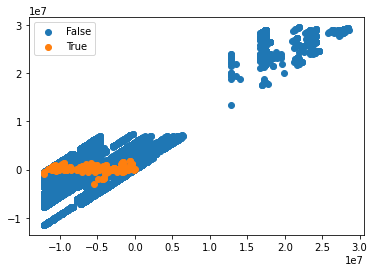

Counter({False: 4994, True: 2497})


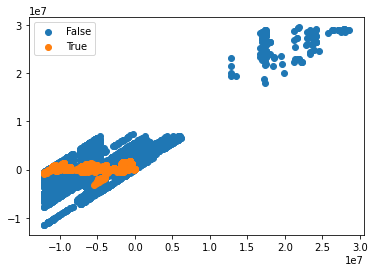

In [182]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#Visualise class distribution before rebalancing
summariseClassDistribution(modelsData_trainFeatures, 
                           modelsData_trainLabels)

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
modelsData_trainFeatures, modelsData_trainLabels = pipeline.fit_resample(modelsData_trainFeatures, modelsData_trainLabels)

#Visualise class distribution after rebalancing
summariseClassDistribution(modelsData_trainFeatures, 
                           modelsData_trainLabels)

## 4.3 Modeling - Random Forest

Legend
Recall -  measures the fraction of relevant links that are retrieved
Precision - measures the fraction of retrieved links that are relevant
F-measure - measures the harmonic mean of recall and precision
F2-measure - favors recall
F0.5-measure - favors precision
Average Precision - summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold

   Accuracy  Precision    Recall        F1        F2      F0.5  \
0  0.973575    0.30742  0.763158  0.438287  0.588633  0.349117   

   Average Precision  
0            0.23781  

--------------------------------------------------------------------


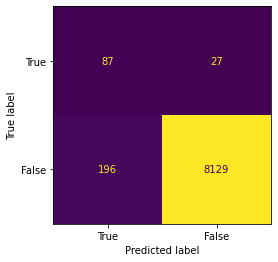

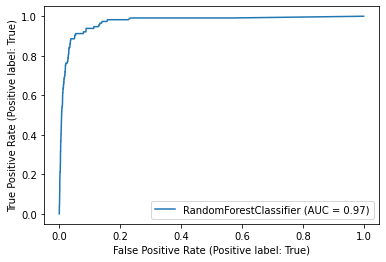

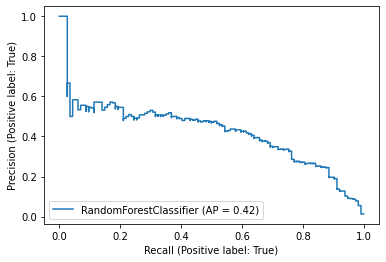

In [184]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 1000)

# Train the model on training data
rf.fit(modelsData_trainFeatures, modelsData_trainLabels.astype(bool));

#Display the model performance    
showModelPerformance(trainedModel = rf, 
                     testFeatures = modelsData_testFeatures, 
                     testLabels = modelsData_testLabels)


## 4.4 Modeling - XGBoost

C:\Users\rande\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Legend
Recall -  measures the fraction of relevant links that are retrieved
Precision - measures the fraction of retrieved links that are relevant
F-measure - measures the harmonic mean of recall and precision
F2-measure - favors recall
F0.5-measure - favors precision
Average Precision - summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold

   Accuracy  Precision    Recall        F1       F2      F0.5  \
0  0.975116   0.326316  0.837838  0.469697  0.63786  0.371703   

   Average Precision  
0           0.275533  

--------------------------------------------------------------------


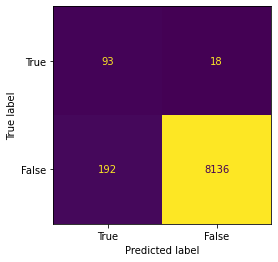

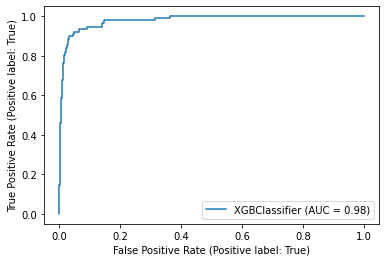

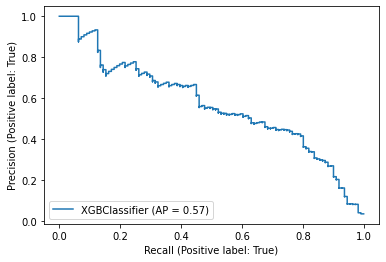

In [173]:
import xgboost as xgb

# Instantiate xgboost
GXBoost = xgb.XGBClassifier(#scale_pos_weight=1,
                            learning_rate=0.17,
                            colsample_bytree = 0.5,
                            subsample = 0.9,
                            objective='binary:logistic',
                            n_estimators=500,
                            max_depth=9,
                            gamma=0.02
                           # seed=27
)



# Train the model on training data
GXBoost.fit(modelsData_trainFeatures, modelsData_trainLabels);

#Display the model performance    
showModelPerformance(trainedModel = GXBoost, 
                     testFeatures = modelsData_testFeatures, 
                     testLabels = modelsData_testLabels)

# Hyperparameter Tuning

In [117]:
startTime = time.time()

# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define model
model = xgb.XGBClassifier()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['n_estimators'] = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
space['max_depth'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
space['subsample'] = [0.5, 0.6, 0.7, 0.8, 0.9]
space['gamma'] = [0.01, 0.02, 0.03, 0.04, 0.05]
space['colsample_bytree'] = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
space['learning_rate'] = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]


# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='precision', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(modelsData_trainFeatures, modelsData_trainLabels)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeDif = str(time.time() - startTime)
print("Finished after " + timeDif + " sec")

C:\Users\rande\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score: 0.9648012532962368
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.17, 'gamma': 0.02, 'colsample_bytree': 0.5}
Finished after 17411.853681325912 sec


In [177]:
startTime = time.time()

# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define model
model = RandomForestClassifier(n_estimators = 500)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# define search space
space = dict()
space['n_estimators'] = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
space['max_depth'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
space['min_samples_split'] = [1, 2, 3]



# define search
search = RandomizedSearchCV(model, space, n_iter=100, scoring='precision', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(modelsData_trainFeatures, modelsData_trainLabels)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

timeDif = str(time.time() - startTime)
print("Finished after " + timeDif + " sec")

C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.92592341 0.93846441 0.94366428 0.92939502 0.93512844
 0.94204671 0.93449289 0.94201819 0.91130039 0.93081888 0.93376807
 0.93443599 0.92897266        nan 0.93503272 0.91072349 0.93881312
 0.92740595 0.9324085         nan 0.92965641        nan 0.88425715
 0.93824768 0.94387156        nan 0.94430899 0.93395353 0.88655259
 0.92504707        nan 0.93324114 0.93273177        nan        nan
 0.88374049        nan        nan 0.92710531        nan 0.93482896
        nan 0.94193594        nan 0.93422094 0.9113284  0.92893426
        nan 0.88388039 0.93338419        nan 0.93005516        nan
 0.93103949        nan        nan 0.93964496 0.93407682 0.93371602
        nan 0.94439421 0.94196266 0.93756019        nan        nan
 0.93881141 0.94217105 0.94348814 0.93090153 0.94400439 0.92792378
        nan 0.94276203        nan        nan 0.92875152 0.942188
 

Best Score: 0.9443942094803948
Best Hyperparameters: {'n_estimators': 900, 'min_samples_split': 2, 'max_depth': 10}
Finished after 511.6415455341339 sec
